# Data Analyst Milestone 2: Exploratory Data Analysis

**Objective**

The objective of milestone-2 is to perform Data preprocessing & EDA to understand about the digital transformation initiative. The output of milestone-2 will be used in milestone-3 to create an interactive dashboard for decision making. In order to do that follow the solution approach given in the capstone project overview & use the learners file for milestone-2 to answer the business questions.



## Importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset 

Run the code written below. After running the code, Google Colab will ask you to upload the.csv file. Please upload the same.

In [3]:
# read the data
df = pd.read_csv('C:/Users/15612/Downloads/AlphaKart_milestone2_input.csv')
# add the file path and file name Alphacart_milestone1_output.csv
# returns the first 5 rows


In [10]:
df.head()

,customer_id,marital_status,occupation,education,warehouse_name,order_id,order_date,order_price,delivery_charges,coupon_discount,order_type,order_payment,is_expedited_delivery,distance_to_nearest_warehouse,customer_satisfaction,age,warehouse_area_type,warehouse_size,total_bill
0,ID0571731474,Yes,Manager,Masters,Nickolson,ORD001041,2021-06-13,8725,66.86,15,COD,Cash,False,0.7237,False,24,Commercial,Medium,7483.11
1,ID6167441063,Yes,Clerical,School,Thompson,ORD004361,2021-06-02,22220,53.80,15,COD,Cash,False,1.4593,False,30,Industrial,Large,18940.80
2,ID6221450539,Yes,Lawyer,Masters,Nickolson,ORD004602,2021-06-17,10460,65.47,15,COD,Debit Card,True,1.0229,True,23,Commercial,Medium,8956.47
3,ID2383211221,Yes,Manager,High School,Nickolson,ORD004848,2021-06-13,15070,79.13,5,COD,Debit Card,True,1.0328,True,28,Commercial,Medium,14395.63
4,ID0248129431,No,Student,School,Nickolson,ORD005232,2021-07-09,5905,95.22,15,COD,Credit Card,True,0.1227,True,31,Commercial,Medium,5114.47


## Data Summary

#### **Question 1:** How many rows and columns are present in the data?

In [6]:
df.shape

(500, 19)

Observations: The dataset has 500 rows and 19 columns.

#### **Question 2:** What are the datatypes of the different columns in the dataset? 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    500 non-null    object 
 1   marital_status                 500 non-null    object 
 2   occupation                     500 non-null    object 
 3   education                      500 non-null    object 
 4   warehouse_name                 500 non-null    object 
 5   order_id                       500 non-null    object 
 6   order_date                     500 non-null    object 
 7   order_price                    500 non-null    int64  
 8   delivery_charges               500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_type                     477 non-null    object 
 11  order_payment                  500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

Observations: 
- All the columns have 500 observations except order_type which has 477 observations indicating that there are some missing values in order_type. 
- order_date is being read as a 'object' data type but it should be in date-time format.
- The rest of the object type columns contain categories in them.

#### Changing order_date from object type to date-time format

In [49]:
df['order_date'] = pd.to_datetime(df['order_date'], format="%Y-%m-%d")

#### Changing categorical object types to category datatypes

In [80]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,customer_id,marital_status,occupation,education,warehouse_name,order_id,order_date,order_price,delivery_charges,coupon_discount,order_type,order_payment,is_expedited_delivery,distance_to_nearest_warehouse,customer_satisfaction,age,warehouse_area_type,warehouse_size,total_bill,order_month
0,ID0571731474,Yes,Manager,Masters,Nickolson,ORD001041,2021-06-13,8725,66.86,15,COD,Cash,False,0.7237,False,24,Commercial,Medium,7483.11,June
1,ID6167441063,Yes,Clerical,School,Thompson,ORD004361,2021-06-02,22220,53.80,15,COD,Cash,False,1.4593,False,30,Industrial,Large,18940.80,June
2,ID6221450539,Yes,Lawyer,Masters,Nickolson,ORD004602,2021-06-17,10460,65.47,15,COD,Debit Card,True,1.0229,True,23,Commercial,Medium,8956.47,June
3,ID2383211221,Yes,Manager,High School,Nickolson,ORD004848,2021-06-13,15070,79.13,5,COD,Debit Card,True,1.0328,True,28,Commercial,Medium,14395.63,June
4,ID0248129431,No,Student,School,Nickolson,ORD005232,2021-07-09,5905,95.22,15,COD,Credit Card,True,0.1227,True,31,Commercial,Medium,5114.47,July
5,ID2222040558,Yes,Clerical,High School,Thompson,ORD005286,2021-07-21,19560,82.44,10,COD,Cash,False,1.4037,False,30,Industrial,Large,17686.44,July
6,ID5002592919,Yes,Doctor,PhD,Nickolson,ORD007249,2021-05-21,6535,60.64,15,COD,Credit Card,False,1.0880,False,26,Commercial,Medium,5615.39,May
7,ID0247018750,Yes,Blue Collar,High School,Thompson,ORD007904,2021-05-29,6865,96.00,15,COD,Cash,True,1.3612,False,24,Industrial,Large,5931.25,May
8,ID3130999251,No,Blue Collar,School,Thompson,ORD008127,2021-07-30,6770,77.13,5,COD,Debit Card,False,0.2540,False,31,Industrial,Large,6508.63,July
9,ID2187983888,Yes,Professional,Bachelors,Nickolson,ORD010057,2021-05-18,3085,53.47,10,Prepaid,EMI,False,1.3575,False,27,Commercial,Medium,2829.97,May


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    500 non-null    category      
 1   marital_status                 500 non-null    category      
 2   occupation                     500 non-null    category      
 3   education                      500 non-null    category      
 4   warehouse_name                 500 non-null    category      
 5   order_id                       500 non-null    category      
 6   order_date                     500 non-null    datetime64[ns]
 7   order_price                    500 non-null    int64         
 8   delivery_charges               500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_type                     500 non-null    category      
 11  order_payment      

All features have the appropriate data type now

## Data Preprocessing

### Missing value Identification and Treatment

#### **Question 3:** Are there any missing values in the data? If so, treat them using an appropriate method.

In [8]:
df.isnull().sum()

customer_id                       0
marital_status                    0
occupation                        0
education                         0
warehouse_name                    0
order_id                          0
order_date                        0
order_price                       0
delivery_charges                  0
coupon_discount                   0
order_type                       23
order_payment                     0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
customer_satisfaction             0
age                               0
warehouse_area_type               0
warehouse_size                    0
total_bill                        0
dtype: int64

#### Observations:
- There are 23 missing values in the feature: order_date.

##### Missing value treatment

In [12]:
df.order_type.value_counts(normalize=True, dropna=False)

Prepaid    0.590
COD        0.364
NaN        0.046
Name: order_type, dtype: float64

In [15]:
df['order_type'].mode()[0]

'Prepaid'

In [18]:
df['order_type'].value_counts()

Prepaid    295
COD        182
Name: order_type, dtype: int64

Prepaid is the most frequent value in the order_type feature. We will replace the missing values with the mode.

In [19]:
df['order_type'] = df['order_type'].fillna(value = df['order_type'].mode()[0])

Let's check the null values of the dataset again to confirm that imputation has been done properly.

In [21]:
df.isnull().sum()

customer_id                      0
marital_status                   0
occupation                       0
education                        0
warehouse_name                   0
order_id                         0
order_date                       0
order_price                      0
delivery_charges                 0
coupon_discount                  0
order_type                       0
order_payment                    0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
customer_satisfaction            0
age                              0
warehouse_area_type              0
warehouse_size                   0
total_bill                       0
dtype: int64

#### **Question 4:** Check the statistical summary of the data.

In [82]:
# get the summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_price,500.0,25415.536000,86357.715521,0.0000,6910.000000,12780.0000,20360.000000,947691.0000
delivery_charges,500.0,76.159380,15.954033,0.0000,65.892500,76.3100,82.555000,114.0400
coupon_discount,500.0,12.900000,7.596408,0.0000,10.000000,15.0000,15.000000,25.0000
distance_to_nearest_warehouse,500.0,2.204224,8.812416,0.1078,0.751425,1.0301,1.408625,94.9734
age,500.0,27.294000,2.911446,22.0000,25.000000,27.0000,30.000000,32.0000
total_bill,500.0,22053.444480,74547.818104,68.2400,6148.380000,11076.7450,17791.850000,853012.7200


#### Observations:
- Order_price and total_bill have a max value that is significantly higher than their mean. This means that these features have outliers. 
- Distance_to_nearest_warehouse also has a max value that is significantly higher than the mean, which means that this feature may also have some outliers. 


### Identification of the Duplicate values if any

In [28]:
# Write the code here
df.duplicated().sum()

0

#### Observations: 
- There are no duplicate values. 

## Data Treatment

#### Let's check if there is any discrepancy in the values in the following columns: 'occupation' and 'education'.

In [30]:
col = ['occupation', 'education']

for column in col: 
    print (df[column].value_counts())

Blue Collar     89
Clerical        84
Professional    76
Manager         73
Lawyer          66
Student         50
Home Maker      37
Doctor          14
Blue-Collar     11
Name: occupation, dtype: int64
High School    144
Bachelors      139
Masters        100
School          69
PhD             34
?               14
Name: education, dtype: int64


Observations:
- In the occupation coluumn there are two columns for Blue Collar and Blue-Collar.
- In the education column there is a column '?' that is undefined

#### Replacing discrepancies

In [31]:
df = df.replace({'occupation': {'Blue-Collar': 'Blue Collar'},
                 'education': {'?': 'Unknown'}})

In [32]:
col = ['occupation', 'education']

for column in col: 
    print (df[column].value_counts())

Blue Collar     100
Clerical         84
Professional     76
Manager          73
Lawyer           66
Student          50
Home Maker       37
Doctor           14
Name: occupation, dtype: int64
High School    144
Bachelors      139
Masters        100
School          69
PhD             34
Unknown         14
Name: education, dtype: int64


## Exploratory Data Analysis (EDA)

#### Now, after handling the missing values and also checking the data types, let's visualise the dataset.

### Univariate Analysis

** By using the below functions, five relevant univariate and bivariate analyses of different columns are performed in addition to the observations.**

In [33]:
#Run this function
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [34]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        color = 'g',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [35]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [36]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Perform univariant analysis on each column and write observations**

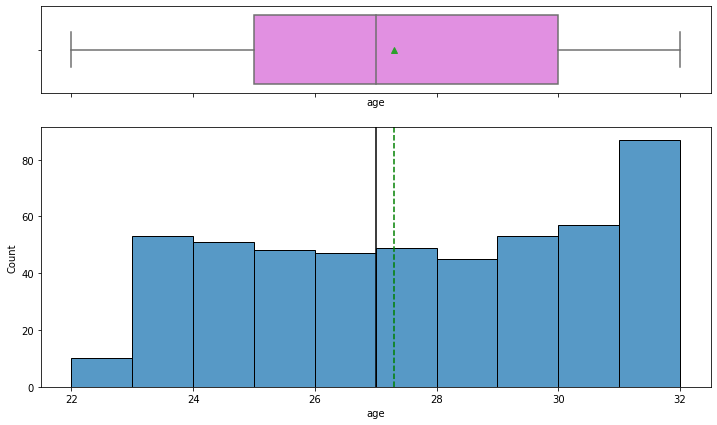

In [38]:
# Write the code here
histogram_boxplot(df, 'age')

#### Observations:
- No outliers are present
- The median age is 27 
- The mean age is 27.5

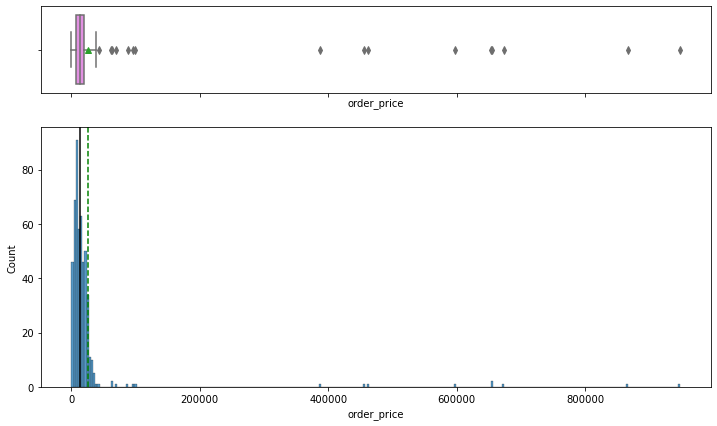

In [39]:
histogram_boxplot(df, 'order_price')

#### Observations:
- Outliers are present in order_price
- Mean and median of data is hard to read due to outliers 

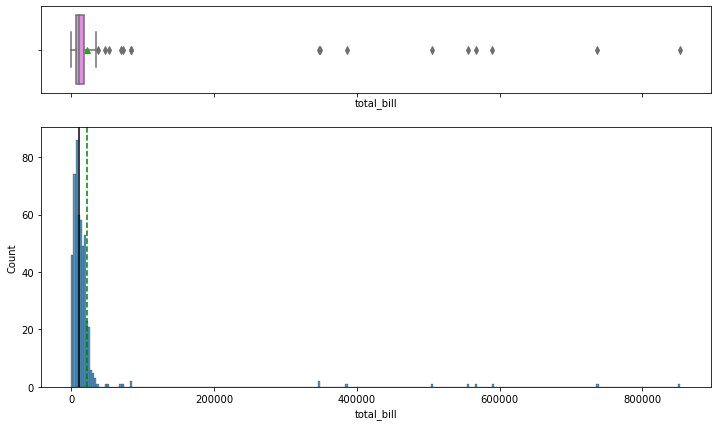

In [57]:
histogram_boxplot(df, 'total_bill')

#### Observations:
- Outliers are present in total_bill
- Mean and median of data is hard to read due to outliers 

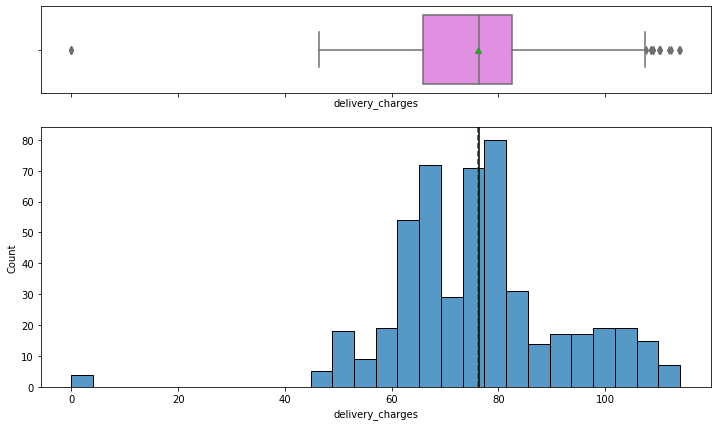

In [66]:
histogram_boxplot(df, 'delivery_charges')

#### Observations:
- Not a lot of outliers present
- Mean and median of delivery charges is 76
- Mode of delivery charges is 80

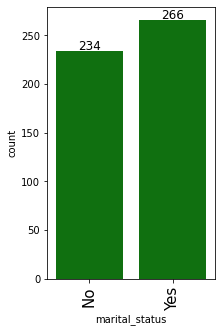

In [62]:
labeled_barplot(df, 'marital_status')

#### Observations: 
- More customers are married (32 more)

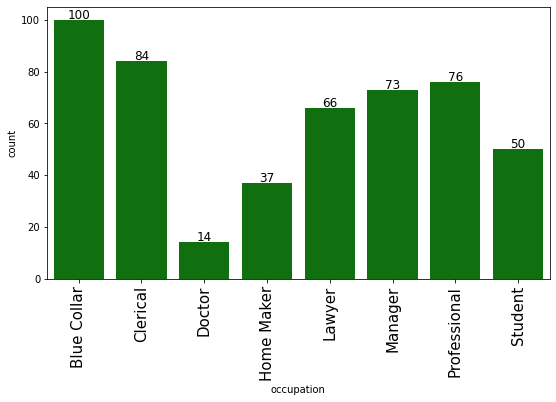

In [63]:
labeled_barplot(df, 'occupation')

#### Observations:
- Most popular occupation within the dataset is "Blue Collar"
- Clerical is the second most popular occupation after "Blue Collar"
- Least popular occupation within the dataset is "Doctor"

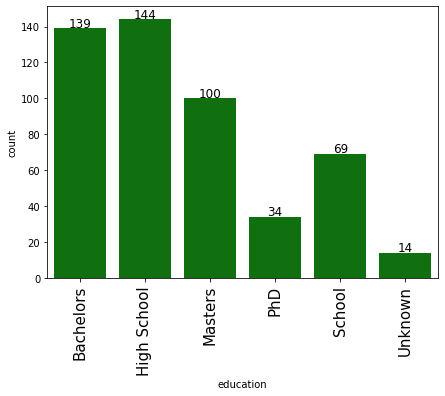

In [64]:
labeled_barplot(df, 'education')

#### Observations:
- Most popular education level within the dataset is High School with Bachelors following close behind it.
- PhD is the least popular education level
- There are 14 customers with an Unknown education level

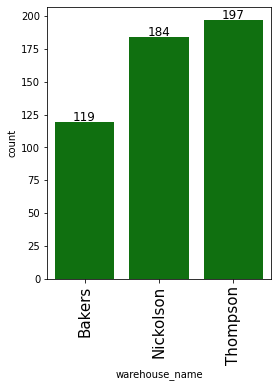

In [65]:
labeled_barplot(df, 'warehouse_name')

#### Observations:
- Thompson is the most popular warehouse with Nickolson follwoing close behind it with 13 less orders 

### Bivariate Analysis


#### Plot the heatmap.

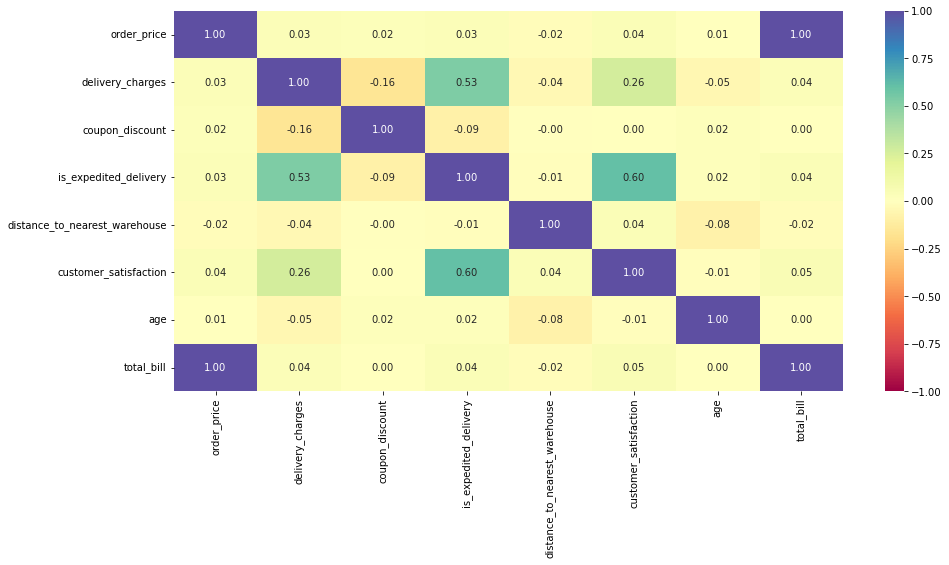

In [42]:
# Write the code here
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()

#### Observations:
- There is a high positive correlation between the features is_expedited_delivery and customer_satisfaction. As well as is_expedited_delivery and delivery_charges.
- There is a slight positive correlarion between customer_satisfaction and delivery_charges. 
- There is a slight negative correlation between coupon_discount and delivery_charges.

**Do the bivariate analysis between column name - "customer_satisfaction" and different integer and categorical variables and write down the observations.**

customer_satisfaction  False  True  All
marital_status                         
All                      238   262  500
Yes                      121   145  266
No                       117   117  234
------------------------------------------------------------------------------------------------------------------------


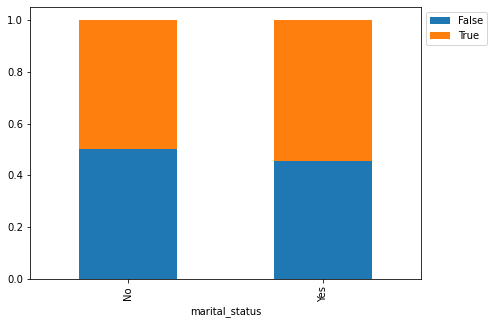

In [43]:
# Write the code here
stacked_barplot(df, "marital_status","customer_satisfaction")

#### Observations:
- There seems to be no significant correlation between marital status and customer satisfaction. 
- Customer satisfaction for both married and not married are pretty equal.

customer_satisfaction  False  True  All
education                              
All                      238   262  500
Bachelors                 69    70  139
High School               60    84  144
Masters                   56    44  100
School                    31    38   69
PhD                       17    17   34
Unknown                    5     9   14
------------------------------------------------------------------------------------------------------------------------


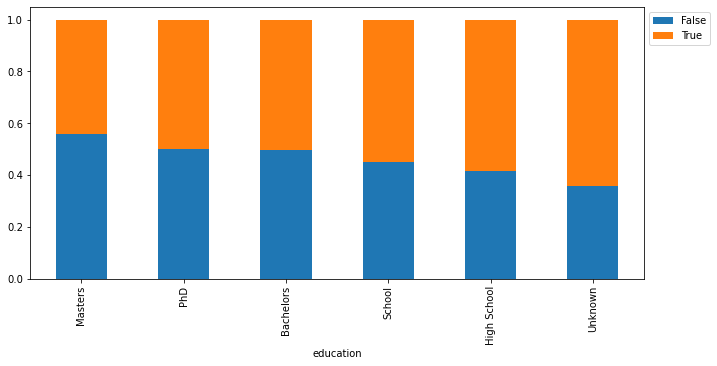

In [44]:
stacked_barplot(df, "education","customer_satisfaction")

#### Observations: 
- Customers with a Masters show the most customer unsatisfaction.
- Those with an unknown and high school education level have the most satisfaction. 


customer_satisfaction  False  True  All
occupation                             
All                      238   262  500
Blue Collar               47    53  100
Professional              40    36   76
Lawyer                    38    28   66
Manager                   38    35   73
Clerical                  32    52   84
Student                   21    29   50
Home Maker                14    23   37
Doctor                     8     6   14
------------------------------------------------------------------------------------------------------------------------


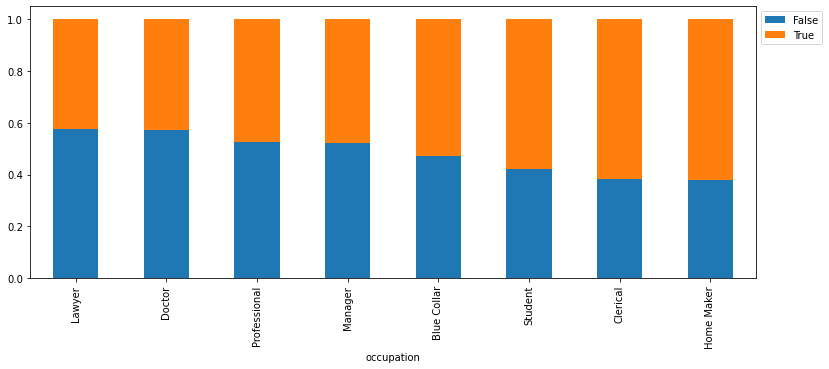

In [45]:
stacked_barplot(df, "occupation","customer_satisfaction")

#### Observations: 
- Customers with the occupation of a lawyer and doctor have the least customer satisfaction out of all the other occupations in the dataset.
- Customers with the occupation of a Clerical or Home-maker have the highest customer satisfaction.

customer_satisfaction  False  True  All
warehouse_size                         
All                      238   262  500
Large                     96   101  197
Medium                    85    99  184
Small                     57    62  119
------------------------------------------------------------------------------------------------------------------------


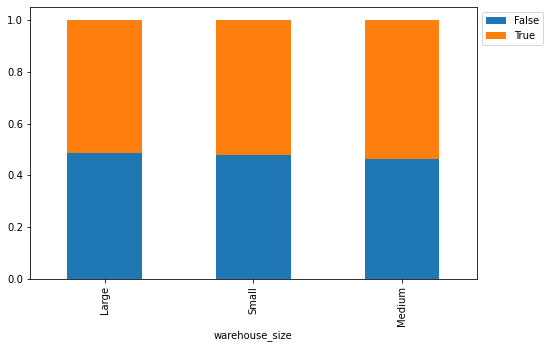

In [69]:
stacked_barplot(df, "warehouse_size","customer_satisfaction")

#### Observations: 
- There are no significant correlations between warehouse_size and customer_satisfaction. Customer satisfaction over the three different warehouse sizes are all very similar.

customer_satisfaction  False  True  All
is_expedited_delivery                  
All                      238   262  500
False                    195    56  251
True                      43   206  249
------------------------------------------------------------------------------------------------------------------------


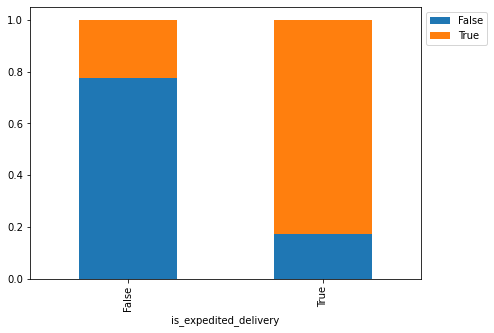

In [71]:
stacked_barplot(df, "is_expedited_delivery","customer_satisfaction")

#### Observations:
- Customers with expedited delivery have significantly higher customer satisfaction than customers who do not have expedited delivery. 
- Customers without expedited delivery have significantly lower customer satisfaction. 

customer_satisfaction  False  True  All
warehouse_area_type                    
All                      238   262  500
Industrial                96   101  197
Commercial                85    99  184
Residential               57    62  119
------------------------------------------------------------------------------------------------------------------------


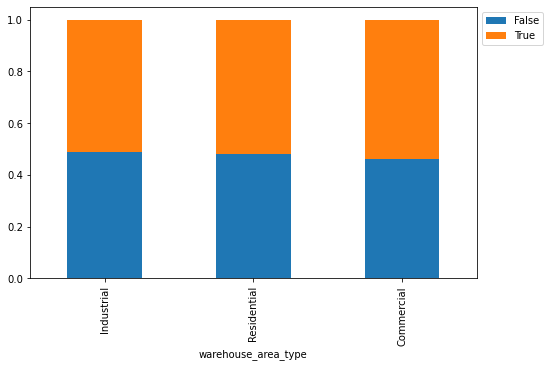

In [72]:
stacked_barplot(df, "warehouse_area_type","customer_satisfaction")

#### Observations:
- There are no significant correlation between customer satisfaction and warehouse_area_type.
- Equal level of satisfaction amongst all warehouse area types.

customer_satisfaction  False  True  All
order_type                             
All                      238   262  500
Prepaid                  137   181  318
COD                      101    81  182
------------------------------------------------------------------------------------------------------------------------


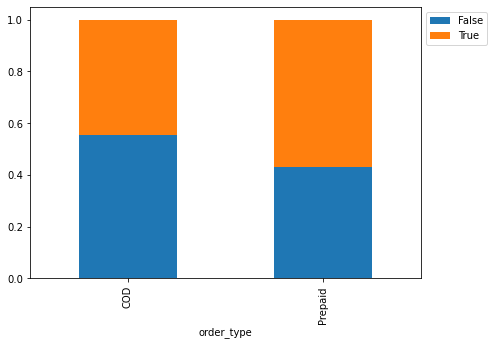

In [73]:
stacked_barplot(df, "order_type","customer_satisfaction")

#### Observations: 
- Customers who had prepaid orders had higher customer satisfaction than COD orders.
- COD order types have the lowest customer satisfaction.

customer_satisfaction  False  True  All
coupon_discount                        
All                      238   262  500
15                        78    76  154
10                        68    75  143
25                        45    54   99
0                         28    29   57
5                         19    28   47
------------------------------------------------------------------------------------------------------------------------


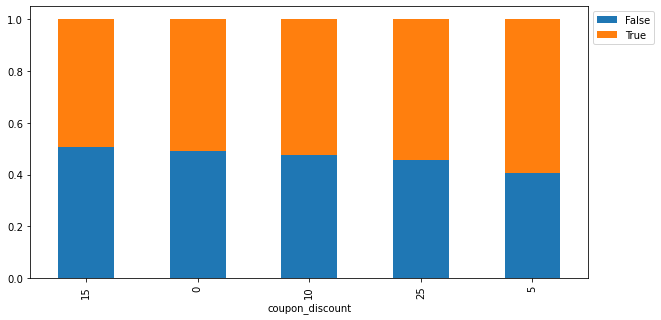

In [75]:
stacked_barplot(df, "coupon_discount","customer_satisfaction")

#### Observations:
- There are no significant correlation between customer satisfaction and coupon_discount.
- 5% coupon discount had a slight higher customer satisfaction then the rest of the discounts. 

## Answer the following business questions based upon the data

##### [Q1] What is the revenue across each warehouse?

In [46]:
df.groupby('warehouse_name')['total_bill'].sum() #group by warehouse name and find the sum of the total bill will allow us to get the "revenue" for each warehouse name

warehouse_name
Bakers       2327818.79
Nickolson    3026175.36
Thompson     5672728.09
Name: total_bill, dtype: float64

#### Observations: 
- The most revenue came out of the Thompson warehouse by over a million dollars compared to the rest of the warehouses. 
- The least amount of revenue came out of the Bakers warehouse. 

##### [Q2] What is the distribution of orders across different months?

In [52]:
df['order_month'] = df.order_date.dt.month_name() # extracting the month name from the date

In [53]:
df.order_month.value_counts() #count the number of orders in each month

May     174
July    173
June    153
Name: order_month, dtype: int64

#### Observations: 
May had the highest number of orders compared to all the other months.

##### [Q3] What is the revenue generated across various months?

In [56]:
df.groupby('order_month')['total_bill'].sum() #group by order month and find the sum of the total bill will allow us to get the "revenue" for each month

order_month
July    4450092.56
June    3278631.03
May     3297998.65
Name: total_bill, dtype: float64

#### Observations: 
- July brought the most revenue out of all the months by a million. 
- May brought the least revenue.

##### [Q4] What is the customer satisfaction distribution across different coupon discounts?

customer_satisfaction  False  True  All
coupon_discount                        
All                      238   262  500
15                        78    76  154
10                        68    75  143
25                        45    54   99
0                         28    29   57
5                         19    28   47
------------------------------------------------------------------------------------------------------------------------


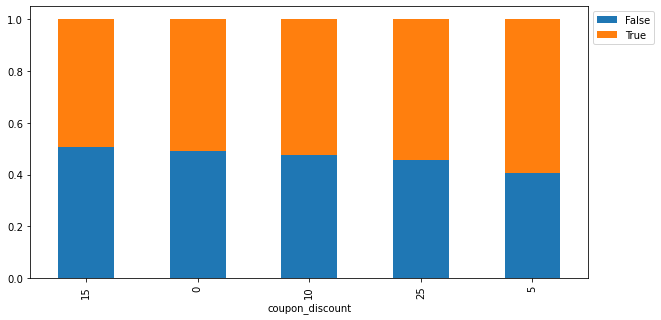

In [86]:
stacked_barplot(df, "coupon_discount","customer_satisfaction")

#### Barplot of Unsatisfied Customers across Coupon Discounts: 

<AxesSubplot:>

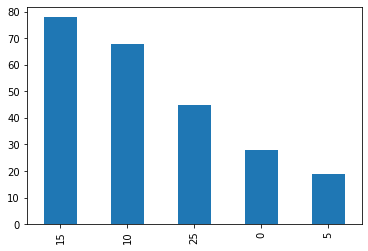

In [47]:
df[df.customer_satisfaction == False]['coupon_discount'].value_counts().plot(kind = 'bar')

#### Barplot of Satisfied Customers across Coupon Discounts: 

<AxesSubplot:>

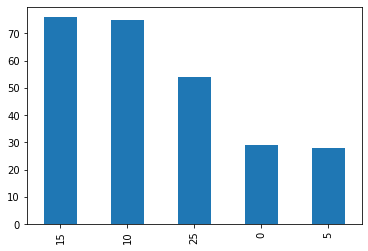

In [84]:
df[df.customer_satisfaction == True]['coupon_discount'].value_counts().plot(kind = 'bar')

#### Observations: 
- For the most part across a majority of the coupon discounts there were an equal number of customers who were satisfied and unsatisfied with their order. 
- However those with a 25% and 5% discount had the most percentage of customers who were satisfied. Essentially there were slightly more customers who were satisfied with their order than unsatisfied.

## Conclusion

### Observations & Recommendations for Target Audience: 
- The mean age is 27.5.
    - Make sure to target those in their late 20s more than any other age group. 
- Most popular education level within the dataset is High School with Bachelors following close behind it.
    - Target those in these education levels. 
- Most popular occupation within the dataset is "Blue Collar". Clerical is the second most popular occupation after "Blue Collar". Least popular occupation within the dataset is "Doctor". 
    - Target those customers who have the occupation of Blue Collar and Clerical since they are the two most frequent consumers. 
    
### Observations & Recommendations for Revenue:
- July brought the most revenue out of all the months by a million. 
- May brought back the least amount of revenue comapred to the rest of the months despite the fact that it had the most amount of orders. 
    - Too many coupon discounts may have been given during this time. 
    - For the future it is important to set a limit to the amount of coupon discounts for each month. 
- The most revenue came out of the Thompson warehouse by over a million dollars compared to the rest of the warehouses.
- The least amount of revenue came out of the Bakers warehouse.
    - Check on the Bakers warehouse because they might need more assistance or funding. 

    
### Observations & Recommendations for Customer Satisfaction:
- Customers who had prepaid orders had higher customer satisfaction than COD orders.
    - Recommend that customers do pre-paid orders rather than cash on delivery orders. 
    - Focus on improving customer satisfaction on cash on delivery orders. 
- Customers with expedited delivery have significantly higher customer satisfaction than customers who do not have expedited delivery.
    - Recommend that customers do expedited delivery.
    - Focus on improving the delivery for customers that do not order expedited delivery.
- Customers with the occupation of a lawyer and doctor have the least customer satisfaction out of all the other occupations in the dataset. Customers with the occupation of a Clerical or Home-maker have the highest customer satisfaction.
    - Focus on improving customer satisfaction for lawyers and doctors.
- For the most part across a majority of the coupon discounts there were an equal number of customers who were satisfied and unsatisfied with their order.
- However those with a 25% and 5% discount had the most percentage of customers who were satisfied. Essentially there were slightly more customers who were satisfied with their order than unsatisfied.
    - Don't focus too much on coupon discounts because they dont have much of an effect on customer satisfaction. 

In [87]:
### Export the dataset to be used for next milestone
df.to_csv('milestone2_output.csv', index=False)

**Submit this notebook file**